## Behavioral Finance

Behavioral Finance

Consider a Barberis, Huang and Santos (2001) economy with the following parameter choices for the investor's utility function:

δ=0.99,γ=1,λ=2
Consumption growth has a lognormal distribution:

lng̃ =0.02+0.02ϵ̃ 
where ε is a standard normal random variable. With these parameter choices, the risk-free rate is constant at 1.0303 per year. Simulate the distribution for consumption growth with (at least) 104 random draws for ε. 

Define x as one plus the dividend yield for the market portfolio:

x=(1+PD)DP=1+DP
and define the error term:

e(x)=0.99b0E[ν̂ (xg̃ )]+0.99x−1
 where utility from financial gain or loss is given by:

ν̂ (R)=R−1.0303forR≥1.0303
ν̂ (R)=2(R−1.0303)forR<1.0303
Calculate the equilibrium values of x for b0 in the range [0, 10], in increments of 0.1, using an iterative procedure known as bisection search:

Set x– = 1 and x+ = 1.1. Use the simulated distribution of consumption growth to confirm that e(x–) < 0 and e(x+) > 0. Hence solution for x must lie between x– and x+.
Set x = 0.5*(x– + x+), and use the simulated distribution of consumption growth to calculate e(x).
If |e(x)| < 10–5, then x is (close enough to) the solution.
Otherwise, if e(x) < 0, then the solution lies between x and x+, so repeat the procedure from step 2 with x– = x.
Otherwise, if e(x) > 0, then the solution lies between x– and x, so repeat the procedure from step 2 with x+ = x.
Use x to calculate the price-dividend ratio for the market portfolio:

PD=1x−1
Plot the price-dividend ratio (on the vertical axis) vs b0 (on the horizontal axis). 

Also, calculate the expected market return:

E[Rm]=E[xg̃ ]
Plot the equity premium (on the vertical axis) vs b0 (on the horizontal axis). 

Briefly explain the economic significance of the investor's utility function for financial gain or loss [i.e., ν(R)], as well as the economic significance of the parameters b0 and λ.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
lambda_=2  # lambda is the degree of loss aversion
delta = 0.99 #Gamma is the coeffcient of risk aversion of investor
gama = 1    #Discount factor to indicate investor's impatient

Consumption growth has a lognormal distribution:

lng̃ =0.02+0.02ϵ̃ 
where ε is a standard normal random variable. With these parameter choices, the risk-free rate is constant at 1.0303 per year.

In [5]:
np.random.seed(1)
rf = 1.0303
num_1 = 10000
epsilon = np.random.standard_normal(num_1)
consumption_growth = np.exp(0.02+0.02*epsilon)  #g

In [ ]:
# Rf = E[g]**(Gamma/delta)
Rf=(g.mean()**Gamma)/delta

Define x as one plus the dividend yield for the market portfolio:

x=(1+P/D)D/P=1+D/P
and define the error term:

e(x)=0.99b0E[ν̂ (xg̃ )]+0.99x−1
 where utility from financial gain or loss is given by:

ν̂ (R)=R−1.0303 for R≥1.0303
ν̂ (R)=2(R−1.0303) for R<1.0303

Calculate the equilibrium values of x for b0 in the range [0, 10], in increments of 0.1, using an iterative procedure known as bisection search:

1. Set x– = 1 and x+ = 1.1. Use the simulated distribution of consumption growth to confirm that e(x–) < 0 and e(x+) > 0. Hence solution for x must lie between x– and x+.

2. Set x = 0.5*(x– + x+), and use the simulated distribution of consumption growth to calculate e(x).

3. If |e(x)| < 10–5, then x is (close enough to) the solution.

4. Otherwise, if e(x) < 0, then the solution lies between x and x+, so repeat the procedure from step 2 with x– = x.

5. Otherwise, if e(x) > 0, then the solution lies between x– and x, so repeat the procedure from step 2 with x+ = x.

Use x to calculate the price-dividend ratio for the market portfolio:

P/D=1/(x−1)
Plot the price-dividend ratio (on the vertical axis) vs b0 (on the horizontal axis). 

Also, calculate the expected market return:

E[Rm]=E[xg̃ ]
Plot the equity premium (on the vertical axis) vs b0 (on the horizontal axis). 

Text(0.5, 1.0, 'Relation between Equity Premium and scale factor b0')

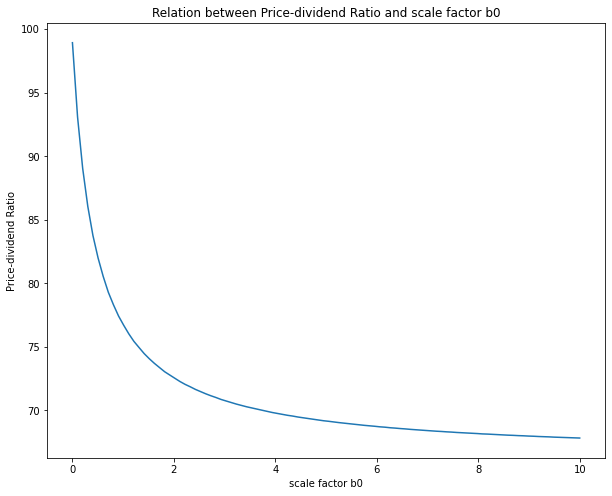

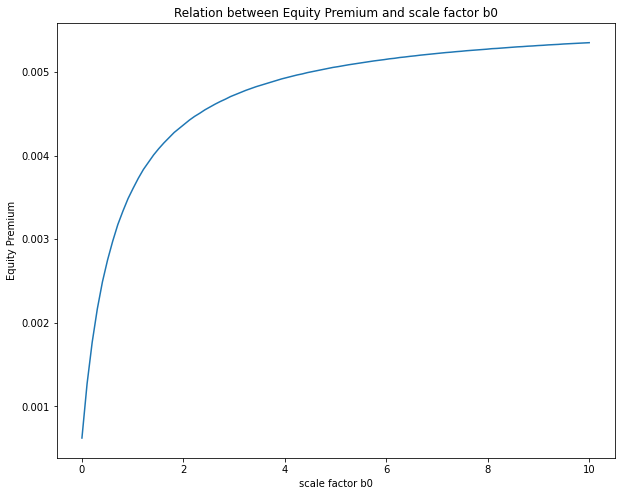

In [6]:
num_2 = 100
b0 = np.linspace(0,10,num_2)
nvhat = np.zeros(num_1)
x_solution = np.zeros(num_2)

for n in range(num_2):
    x_bi = {"x-":1, "x+":1.1}
    ex = {"x-":np.nan,"x+":np.nan,"x":1}
    while abs(ex["x"]) >= 10**(-5):
        x = (x_bi["x-"]+x_bi["x+"])/2
        x_bi["x"] = x
        for i,j in x_bi.items():
            for m in range(num_1):
                if j*consumption_growth[m]>=rf:
                    nvhat[m] = j*consumption_growth[m]-rf
                else:
                    nvhat[m] = 2*(j*consumption_growth[m]-rf)
            ex[i] = 0.99*b0[n]*np.mean(nvhat)+0.99*j-1
        if ex["x"] < 0:
            x_bi["x-"] = x_bi["x"]
        elif ex["x"] > 0:
            x_bi["x+"] = x_bi["x"]
    else:
        xa = x_bi["x"]
    x_solution[n] = xa

PD_ratio = 1/(x_solution-1)

fig,ax = plt.subplots(figsize=(10,8))
ax.plot(b0,PD_ratio)
plt.xlabel('scale factor b0')
plt.ylabel('Price-dividend Ratio')
plt.title('Relation between Price-dividend Ratio and scale factor b0')

Mkt_rt = x_solution*np.mean(consumption_growth)
Equity_premium = Mkt_rt - 1.0303
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(b0,Equity_premium)
plt.xlabel('scale factor b0')
plt.ylabel('Equity Premium')
plt.title('Relation between Equity Premium and scale factor b0')

In [9]:
Equity_premium

array([0.00062008, 0.00126792, 0.00176627, 0.00216494, 0.00248886,
       0.00275049, 0.00297475, 0.00317408, 0.00333604, 0.00348555,
       0.00361013, 0.00372849, 0.00383439, 0.0039216 , 0.00400881,
       0.00408356, 0.00415208, 0.00421437, 0.00427666, 0.0043265 ,
       0.00437633, 0.00442617, 0.00446977, 0.00450715, 0.00454764,
       0.0045819 , 0.00461616, 0.00464731, 0.00467534, 0.00470648,
       0.0047314 , 0.00475632, 0.00478124, 0.00480304, 0.00482484,
       0.00484353, 0.00486222, 0.0048809 , 0.00489959, 0.00491828,
       0.00493385, 0.00494943, 0.004965  , 0.00497746, 0.00499303,
       0.00500549, 0.00501795, 0.00503041, 0.00504286, 0.00505532,
       0.00506467, 0.00507557, 0.00508647, 0.00509581, 0.00510516,
       0.0051145 , 0.00512385, 0.00513319, 0.00514098, 0.00514876,
       0.00515811, 0.00516434, 0.00517368, 0.00517991, 0.0051877 ,
       0.00519392, 0.00520171, 0.00520794, 0.00521417, 0.0052204 ,
       0.00522663, 0.00523286, 0.00523753, 0.00524376, 0.00524

Method 2

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#get 1000 g
np.random.seed(1)
ep=np.random.normal(0,1,10000)
g=np.exp(0.02+0.02*ep)

def v(R):
    if R>=1.0303:
        return R-1.0303
    else:
        return 2*(R-1.0303)

def e(b0,x):
    vlist=np.mean([v(x*i) for i in g])
    return 0.99*b0*vlist+0.99*x-1

def bisection(a,b,b0):
    x=(a+b)/2
    if (abs(e(b0,x))<10**(-4)):
        return x
    elif e(b0,x)<0:
        a=x
        return bisection(a,b,b0)
    elif e(b0,x)>0:
        b=x
        return bisection(a,b,b0)

a=1
b=1.1
b0_range=np.linspace(0,10,200)  # set 200 b_0
xlist=[bisection(a,b,b0) for b0 in b0_range]
PD=1/(np.array(xlist)-1)

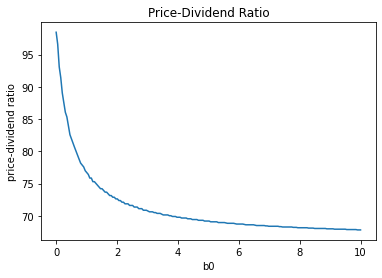

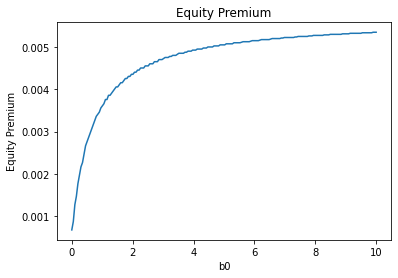

In [8]:
#plot price-dividend ratio
plt.plot(b0_range,PD)  
plt.title('Price-Dividend Ratio')
plt.xlabel('b0')
plt.ylabel('price-dividend ratio')
plt.show()

#plot equity premium
Rm=np.array([np.mean([m*n for n in g]) for m in xlist])
ep=Rm-1.0303
plt.plot(b0_range,ep)  
plt.title('Equity Premium')
plt.xlabel('b0')
plt.ylabel('Equity Premium')
plt.show()

Economic significance:

Utility function for financial gain or loss is based on prospect theory, where financial gain or loss is measured relative to reference level based on risk-free rate

Investor is more sensitive to financial loss than financial gain, and λ determines degree of loss aversion

b0 determines amount of emphasis that investor puts on utility from financial gain or loss, compared to utility of consumption